# **DATA SCIENCE II - CODERHOUSE [61695]**

**ALUMNO: Marcos Daniel Amenabar**

**Introducción:** En este proyecto, analizamos un dataset de Spotify que abarca los lanzamientos de discos y la popularidad de los artistas desde 2007 hasta 2025. Nuestro objetivo es desentrañar los patrones de popularidad, identificar los países con mayor cantidad de lanzamientos y examinar cómo estos aspectos han evolucionado a lo largo del tiempo.

A través de este análisis, buscamos proporcionar una visión completa y detallada del panorama musical global y cómo los gustos musicales se han transformado en las últimas décadas. Utilizando técnicas de visualización de datos y análisis estadístico, exploramos cómo ha cambiado la popularidad de los artistas, qué países tienen la mayor cantidad de lanzamientos, y cómo la duración de las canciones ha evolucionado en los últimos años.

**Descripción del problema:** Para este análisis, contamos con una base de datos de aproximadamente 3287 filas y 20 columnas, obtenida a través de la API de Spotify. La base de datos contiene información relevante como el año de lanzamiento, el álbum, los mercados disponibles, la popularidad y la duración de las canciones. A lo largo de los años, Spotify ha reducido la cantidad de información compartida vía API, pero este dataset aún nos permite realizar un análisis significativo sobre la disponibilidad internacional y la popularidad de las canciones.

**Objetivo:** El objetivo principal es procesar y analizar la base de datos para obtener insights sobre la disponibilidad internacional de canciones y la popularidad de los artistas. Queremos identificar los países con mayor cantidad de lanzamientos, analizar la evolución de la popularidad de los artistas a lo largo del tiempo, y explorar la relación entre la duración de las canciones y su popularidad.


**Fuente:** Los datos utilizados en este trabajo fueron obtenidos a través de la API de Spotify.

# **INSTALACIÓN DE SPOTIPY**

In [8]:
#Instalar Spotipy
!pip install spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.5/261.5 kB 14.7 MB/s eta 0:00:00


# **INSTALACIÓN DE PYCOUNTRY PARA PAÍSES**

In [9]:
#Instalar pyCountry para paises.
!pip install pycountry


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 56.1 MB/s eta 0:00:00


# **IMPORTACIÓN DE LIBRERÍA Y CARGA DE LOS DATOS**

In [10]:
#Importaciones
import pandas as pd
import os
from collections import Counter
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry

# **ACCESO A LA API DE SPOTIFY**

In [11]:
# Configuro mis credenciales
CLIENT_ID = 'b161377d5a3d416b97b6d8911ae1a36f'
CLIENT_SECRET = 'dd7e3ef5a7e14ee993cd2e543e0f1aad'

# Autenticación con la API de Spotify
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Obtener el Access Token
token_info = client_credentials_manager.get_access_token()
access_token = token_info['access_token']

print(f"Access Token: {access_token}")

Access Token: BQCS78XU3OG3T5E2jHKZRfqEz7i0yf6jtBiANXf-7ngbVC-sZUYpcEXdJHV7JPqOxl6lSz3kG_ORY3Mwl9ZkM2AmptZw8gVK_OJVlCqjM7HWTyT_KMkKmEV73cYrNu59dUncDToh_OQ


<ipython-input-11-2bf679b3d5f5>:10: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  token_info = client_credentials_manager.get_access_token()


# **DATOS DEL CÓDIGO:**

Este bloque de código define una función get_top_tracks_by_year_canciones que obtiene las canciones más populares de un año específico, desde 2007 hasta 2025, utilizando la API de Spotify. La función maneja la paginación de los resultados y crea un DataFrame con las canciones obtenidas.

In [12]:
#Definir top canciones
def get_top_tracks_by_year_canciones(year, limit=50):

    offset = 0
    results = []

    while True:
        response = sp.search(q=f'year:{year} top tracks', limit=limit, offset=offset)
        tracks = response['tracks']['items']
        results.extend(tracks)

        #Verificar si hay más páginas
        if 'next' not in response['tracks']:
            break

        #Actualizar el offset para la siguiente página
        offset += limit
        print (year, offset)
        if offset >= 160:
            break

    # Crear un DataFrame con los resultados
    df = pd.DataFrame(results)
    # Seleccionar las columnas de interés

    return df

**EXTRACCIÓN DE INFORMACIÓN**

In [13]:
#Extraigo el DF de la API, añadiendo el AÑO(year) que no se encuentra en las columnas.
# Crear un DataFrame vacío con las columnas de interés
df = pd.DataFrame(columns=['year', 'album', 'artists', 'available_markets', 'disc_number', 'duration_ms',
                           'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local',
                           'is_playable', 'name', 'popularity', 'preview_url', 'track_number',
                           'type', 'uri'])
# Iterar a través de los años desde 2007 hasta 2025 para extraer los datos
for year in range(2007, 2026):
  # Obtener los datos de las canciones más populares del año
  year_data = get_top_tracks_by_year_canciones(year)
  # Añadir una columna 'year' con el año correspondiente
  year_data['year'] = year
  # Concatenar los datos obtenidos al DataFrame principal
  df = pd.concat([df, year_data], ignore_index=True)

2007 50
2007 100
2007 150
2007 200
2008 50
2008 100
2008 150
2008 200
2009 50
2009 100
2009 150
2009 200
2010 50
2010 100
2010 150
2010 200
2011 50
2011 100
2011 150
2011 200
2012 50
2012 100
2012 150
2012 200
2013 50
2013 100
2013 150
2013 200
2014 50
2014 100
2014 150
2014 200
2015 50
2015 100
2015 150
2015 200
2016 50
2016 100
2016 150
2016 200
2017 50
2017 100
2017 150
2017 200
2018 50
2018 100
2018 150
2018 200
2019 50
2019 100
2019 150
2019 200
2020 50
2020 100
2020 150
2020 200
2021 50
2021 100
2021 150
2021 200
2022 50
2022 100
2022 150
2022 200
2023 50
2023 100
2023 150
2023 200
2024 50
2024 100
2024 150
2024 200
2025 50
2025 100
2025 150
2025 200


In [14]:
#Guardar como JSON el dataset actualizado
df.to_json("./BaseUsada_Amenabar_API.json", orient="records", indent=4)
print("El dataset ha sido guardado como 'BaseUsada_Amenabar.json'")

El dataset ha sido guardado como 'BaseUsada_Amenabar.json'


In [15]:
#Descargo la base de datos comprimida desde GitHub porque no permiten archivos mayores a 25MB
!wget -O /content/bdspotify.zip "https://github.com/MarcosDAmenabar/DS2/raw/refs/heads/main/BaseUsada_Amenabar.zip"

--2025-04-03 20:42:12--  https://github.com/MarcosDAmenabar/DS2/raw/refs/heads/main/BaseUsada_Amenabar.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MarcosDAmenabar/DS2/refs/heads/main/BaseUsada_Amenabar.zip [following]
--2025-04-03 20:42:13--  https://raw.githubusercontent.com/MarcosDAmenabar/DS2/refs/heads/main/BaseUsada_Amenabar.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 881997 (861K) [application/zip]
Saving to: ‘/content/bdspotify.zip’

/content/bdspotify. 100%[===================>] 861.33K  --.-KB/s    in 0.01s   

2025-04-03 20:42:13 (85.8 MB/s) - ‘/content/bdspotify.zip’ s

In [16]:
import zipfile
import os

# Ruta del archivo ZIP
zip_path = "/content/bdspotify.zip"

# Carpeta donde se extraerán los archivos
extract_folder = "/content/extracted_files"

# Descomprimir el archivo ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Verificar qué archivos se han extraído
print("Archivos extraídos:", os.listdir(extract_folder))

Archivos extraídos: ['BaseUsada_Amenabar.json']


In [17]:
# Ruta del JSON dentro de la carpeta extraída (ajústala según el nombre del archivo)
json_path = "/content/extracted_files/BaseUsada_Amenabar.json"

# Cargar el JSON en pandas
df = pd.read_json(json_path)

# Verificar los datos cargados
print(df.head())

   year                                              album  \
0  2007  {'album_type': 'album', 'artists': [{'external...   
1  2008  {'album_type': 'album', 'artists': [{'external...   
2  2008  {'album_type': 'compilation', 'artists': [{'ex...   
3  2008  {'album_type': 'album', 'artists': [{'external...   
4  2008  {'album_type': 'album', 'artists': [{'external...   

                                             artists  \
0  [{'external_urls': {'spotify': 'https://open.s...   
1  [{'external_urls': {'spotify': 'https://open.s...   
2  [{'external_urls': {'spotify': 'https://open.s...   
3  [{'external_urls': {'spotify': 'https://open.s...   
4  [{'external_urls': {'spotify': 'https://open.s...   

                                   available_markets  disc_number  \
0  [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...            2   
1  [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...            1   
2  [AG, AR, BA, BB, BR, BS, BZ, CA, CL, CO, CR, C...            1   
3  [AR, AU, AT

In [18]:
#Cargar el archivo JSON en un DataFrame
#df = pd.read_json("BaseUsada_Amenabar.json")

#print(df.head())  # Verifica las primeras filas para confirmar la carga

In [19]:
#Guardo los datos extraidos desde la API a un .csv
#df.to_csv('top_canciones_2007_2025.csv', index=False)

In [20]:
#Carga del dataset desde el enlace de GitHub
#url = 'https://raw.githubusercontent.com/MarcosDAmenabar/DataScienceII/refs/heads/main/top_canciones_2007_2025.csv'
#df = pd.read_csv(url)

In [21]:
#Muestro la info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               3287 non-null   int64  
 1   album              3287 non-null   object 
 2   artists            3287 non-null   object 
 3   available_markets  3287 non-null   object 
 4   disc_number        3287 non-null   int64  
 5   duration_ms        3287 non-null   int64  
 6   explicit           3287 non-null   bool   
 7   external_ids       3287 non-null   object 
 8   external_urls      3287 non-null   object 
 9   href               3287 non-null   object 
 10  id                 3287 non-null   object 
 11  is_local           3287 non-null   bool   
 12  is_playable        3287 non-null   bool   
 13  name               3287 non-null   object 
 14  popularity         3287 non-null   int64  
 15  preview_url        0 non-null      float64
 16  track_number       3287 

**Observaciones:**

El DataFrame contiene 3287 entradas y 19 columnas.
Todas las columnas tienen el tipo de dato 'object'.
La columna 'preview_url' está completamente vacía y será eliminada.

# EXTRACCIÓN DE NOMBRE DEL ARTISTA

In [22]:
#Sacar el nombre del artista
def extract_artist_name(artists_list):
    if artists_list: # Verificar si la lista de artistas no está vacía
        return artists_list[0]['name'] # Devolver el nombre del primer artista en la lista
    else:
        return None # Devolver None si la lista está vacía

In [23]:
#Se mete en columna artistas y chequea la lista del diccionario.
# Aplicar la función extract_artist_name a la columna 'artists' del DataFrame
# y almacenar los resultados en una nueva columna 'artist'
df['artist'] = df['artists'].apply(extract_artist_name)

In [24]:
#Acá podemos visualizar como se ve añadido en la columna artist de manera correcta
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               3287 non-null   int64  
 1   album              3287 non-null   object 
 2   artists            3287 non-null   object 
 3   available_markets  3287 non-null   object 
 4   disc_number        3287 non-null   int64  
 5   duration_ms        3287 non-null   int64  
 6   explicit           3287 non-null   bool   
 7   external_ids       3287 non-null   object 
 8   external_urls      3287 non-null   object 
 9   href               3287 non-null   object 
 10  id                 3287 non-null   object 
 11  is_local           3287 non-null   bool   
 12  is_playable        3287 non-null   bool   
 13  name               3287 non-null   object 
 14  popularity         3287 non-null   int64  
 15  preview_url        0 non-null      float64
 16  track_number       3287 

**ELIMINACIÓN DE COLUMNA ARTISTS**

In [25]:
#Elimino una columna del diccionario, en este caso "Artists" y dejo la nueva ya añadida llamada "Artist"
df = df.drop('artists', axis=1)

**VERIFICACIÓN DE LAS PRIMERAS FILAS DEL DATASET**


In [26]:
# Verificación de las primeras filas del Dataset.
# Esto nos permite ver una muestra de los datos para asegurarnos de que la extracción y transformación se realizaron correctamente
df.head()

,year,album,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,is_playable,name,popularity,preview_url,track_number,type,uri,artist
0,2007,"{'album_type': 'album', 'artists': [{'external...","[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",2,221893,False,{'isrc': 'QMFMF1542459'},{'spotify': 'https://open.spotify.com/track/3i...,https://api.spotify.com/v1/tracks/3ixsyhSP204p...,3ixsyhSP204pEyP1NejKF6,False,True,Fake Your Way to the Top - Accompaniment Backi...,0,NaN,2,track,spotify:track:3ixsyhSP204pEyP1NejKF6,Stage Stars
1,2008,"{'album_type': 'album', 'artists': [{'external...","[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,243426,False,{'isrc': 'ushm90847789'},{'spotify': 'https://open.spotify.com/track/36...,https://api.spotify.com/v1/tracks/36GZ2Rtn22kh...,36GZ2Rtn22khUbfCKZ3Qoj,False,True,Top Model Chic,0,NaN,3,track,spotify:track:36GZ2Rtn22khUbfCKZ3Qoj,4 PM
2,2008,"{'album_type': 'compilation', 'artists': [{'ex...","[AG, AR, BA, BB, BR, BS, BZ, CA, CL, CO, CR, C...",1,261560,False,{'isrc': 'FR3EP0600070'},{'spotify': 'https://open.spotify.com/track/4W...,https://api.spotify.com/v1/tracks/4WafdytaSVgc...,4WafdytaSVgcUwmpp1k8vA,False,True,4ème top,0,NaN,21,track,spotify:track:4WafdytaSVgcUwmpp1k8vA,David Patrois Trio +2
3,2008,"{'album_type': 'album', 'artists': [{'external...","[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,324146,False,{'isrc': 'QMFMF1546120'},{'spotify': 'https://open.spotify.com/track/38...,https://api.spotify.com/v1/tracks/382bUblQs1qe...,382bUblQs1qe77exrYzMYK,False,True,The Surrey with the Fringe on Top - Complete T...,0,NaN,2,track,spotify:track:382bUblQs1qe77exrYzMYK,Stage Stars
4,2008,"{'album_type': 'album', 'artists': [{'external...","[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,324146,False,{'isrc': 'QMFMF1546134'},{'spotify': 'https://open.spotify.com/track/2W...,https://api.spotify.com/v1/tracks/2WSYt3YcMPGZ...,2WSYt3YcMPGZogEZkKaeH3,False,True,The Surrey with the Fringe on Top - Accompanim...,0,NaN,16,track,spotify:track:2WSYt3YcMPGZogEZkKaeH3,Stage Stars


In [27]:
#Estructura y tipos de datos
#Ahora podemos ver que tiene una columna menos que es la de artists, y abajo del todo está artist.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               3287 non-null   int64  
 1   album              3287 non-null   object 
 2   available_markets  3287 non-null   object 
 3   disc_number        3287 non-null   int64  
 4   duration_ms        3287 non-null   int64  
 5   explicit           3287 non-null   bool   
 6   external_ids       3287 non-null   object 
 7   external_urls      3287 non-null   object 
 8   href               3287 non-null   object 
 9   id                 3287 non-null   object 
 10  is_local           3287 non-null   bool   
 11  is_playable        3287 non-null   bool   
 12  name               3287 non-null   object 
 13  popularity         3287 non-null   int64  
 14  preview_url        0 non-null      float64
 15  track_number       3287 non-null   int64  
 16  type               3287 

# **RESUMEN ESTADÍSTICO DEL DATASET**

In [28]:
# Resumen estadístico
df.describe()

,year,disc_number,duration_ms,popularity,preview_url,track_number
count,3287.000000,3287.000000,3.287000e+03,3287.000000,0.0,3287.000000
mean,2017.209614,1.047764,2.453444e+05,2.944022,NaN,15.676605
std,4.850491,0.632720,1.700932e+05,5.515642,NaN,15.443546
min,2007.000000,1.000000,9.893000e+03,0.000000,NaN,1.000000
25%,2013.000000,1.000000,1.808555e+05,0.000000,NaN,5.000000
50%,2017.000000,1.000000,2.189470e+05,0.000000,NaN,11.000000
75%,2021.000000,1.000000,2.774660e+05,3.000000,NaN,21.000000
max,2025.000000,10.000000,3.625188e+06,48.000000,NaN,121.000000


**REVISIÓN DE VALORES NULOS**

In [29]:
#Revisión de valores nulos en el df
# Esto devuelve el número de valores nulos por columna, lo que ayuda a identificar columnas con datos faltantes
df.isnull().sum()

,0
year,0
album,0
available_markets,0
disc_number,0
duration_ms,0
explicit,0
external_ids,0
external_urls,0
href,0
id,0


La columna **"Preview_url"** se va a eliminar ya que no contiene datos y no tengo que hacer ningún reemplazo de datos ya que todas las demás tienen información relevante.

In [30]:
# Elimino la columna "preview_url" del DataFrame
df = df.drop(columns=['preview_url'])

In [31]:
# Verifico la estructura del DataFrame después de la eliminación
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   year               3287 non-null   int64 
 1   album              3287 non-null   object
 2   available_markets  3287 non-null   object
 3   disc_number        3287 non-null   int64 
 4   duration_ms        3287 non-null   int64 
 5   explicit           3287 non-null   bool  
 6   external_ids       3287 non-null   object
 7   external_urls      3287 non-null   object
 8   href               3287 non-null   object
 9   id                 3287 non-null   object
 10  is_local           3287 non-null   bool  
 11  is_playable        3287 non-null   bool  
 12  name               3287 non-null   object
 13  popularity         3287 non-null   int64 
 14  track_number       3287 non-null   int64 
 15  type               3287 non-null   object
 16  uri                3287 non-null   object


Como verán ya se encuentra eliminada dicha columna.

**CONVERSIÓN DE DURACIÓN DE MILISEGUNDOS A SEGUNDOS**

In [32]:
# Convertirto la duración de milisegundos a segundos y agrego una nueva columna
df['duration_sec'] = df['duration_ms'] / 1000

In [33]:
# Verifico la nueva columna de segundos para hacer mejores comparaciones con el tiempo.
df[['duration_ms', 'duration_sec']].head()

,duration_ms,duration_sec
0,221893,221.893
1,243426,243.426
2,261560,261.560
3,324146,324.146
4,324146,324.146


In [34]:
# Muestro nuevamente el DataFrame para visualizar la nueva columna 'duration_sec'
# Esto nos permite confirmar que la columna se ha agregado correctamente y revisar una muestra de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               3287 non-null   int64  
 1   album              3287 non-null   object 
 2   available_markets  3287 non-null   object 
 3   disc_number        3287 non-null   int64  
 4   duration_ms        3287 non-null   int64  
 5   explicit           3287 non-null   bool   
 6   external_ids       3287 non-null   object 
 7   external_urls      3287 non-null   object 
 8   href               3287 non-null   object 
 9   id                 3287 non-null   object 
 10  is_local           3287 non-null   bool   
 11  is_playable        3287 non-null   bool   
 12  name               3287 non-null   object 
 13  popularity         3287 non-null   int64  
 14  track_number       3287 non-null   int64  
 15  type               3287 non-null   object 
 16  uri                3287 

**VISUALIZACIÓN DE LOS PAÍSES DISPONIBLES**

In [35]:
# Veo los países.
df['available_markets'].head()


,available_markets
0,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
1,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
2,"[AG, AR, BA, BB, BR, BS, BZ, CA, CL, CO, CR, C..."
3,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
4,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."


**FUNCIÓN PARA MODIFICAR LISTA DE CÓDIGOS DE PAÍSES A NOMBRES DE PAÍSES**


In [36]:
# Función para convertir códigos de países en nombres completos de países
def modificar_lista(lista_original):
    lista_modificada = [] #Inicializar una lista vacía para almacenar los nombres modificados
    # Iterar a través de cada elemento en la lista original
    for elemento in lista_original:
        if elemento == 'XK': #Verificar si el código del país es 'XK' (Kosovo)
            lista_modificada.append('Kosovo') #Añadir 'Kosovo' a la lista modificada
        else:
            try:
                #Intentar obtener el nombre del país a partir del código alpha-2
                lista_modificada.append(pycountry.countries.get(alpha_2=elemento).name)
            except:
                #Si ocurre un error, añadir el elemento original a la lista modificada
                lista_modificada.append(elemento)
    return lista_modificada #Devolver la lista modificada

**CONVERSIÓN DE CÓDIGOS DE PAÍSES A NOMBRES COMPLETOS**

In [37]:
# Aplicar la función modificar_lista a la columna 'available_markets' del DataFrame
# y almacenar los resultados en una nueva columna 'available_markets_pais'
df['available_markets_pais'] = df['available_markets'].apply(modificar_lista)

**VISUALIZACIÓN DE LA COLUMNA AVAILABLE_MARKETS_PAIS**

In [38]:
# Mostrar las filas de la columna 'available_markets_pais'
# Esto nos permite visualizar los nombres de los países donde están disponibles los mercados para cada canción.
df['available_markets_pais']

,available_markets_pais
0,"[Argentina, Australia, Austria, Belgium, Boliv..."
1,"[Argentina, Australia, Austria, Belgium, Boliv..."
2,"[Antigua and Barbuda, Argentina, Bosnia and He..."
3,"[Argentina, Australia, Austria, Belgium, Boliv..."
4,"[Argentina, Australia, Austria, Belgium, Boliv..."
...,...
3282,"[Argentina, Australia, Austria, Belgium, Boliv..."
3283,"[Argentina, Australia, Austria, Belgium, Boliv..."
3284,"[Argentina, Australia, Austria, Belgium, Boliv..."
3285,"[Argentina, Australia, Austria, Belgium, Boliv..."


In [39]:
# Mostrar algunas filas de la columna 'available_markets'
print(df['available_markets'].head(10))


0    [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...
1    [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...
2    [AG, AR, BA, BB, BR, BS, BZ, CA, CL, CO, CR, C...
3    [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...
4    [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...
5    [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...
6    [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...
7    [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...
8    [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...
9    [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...
Name: available_markets, dtype: object


**CANTIDAD DE LANZAMIENTO DE DISCOS POR PAÍS (2007-2025)**

In [40]:
# Contar el número de canciones disponibles en cada país
canciones_por_pais = pd.Series([pais for sublist in df['available_markets_pais'] for pais in sublist]).value_counts()

# Mostrar los países con mayor lanzamiento de discos
canciones_por_pais

,count
United States,3287
Mexico,3206
Curaçao,3191
Belgium,3190
Chile,3190
...,...
"Korea, Republic of",2980
Montenegro,2868
Serbia,2863
Kosovo,2863


Según la API de Spotyfi, **¿Cuales son los países con mayor cantidad de lanzamiento de discos?** Como se puede observar, en el ranking 1 figura United States con 3287, siguiendo con México en 3206, Curacao con 3191, Belgium con 3190 y Chile en el 5to lugar con 3190.

**GRÁFICO CIRCULAR DE LOS 5 PAÍSES CON MAYOR CANTIDAD DE LANZAMIENTOS (2007-2025)**

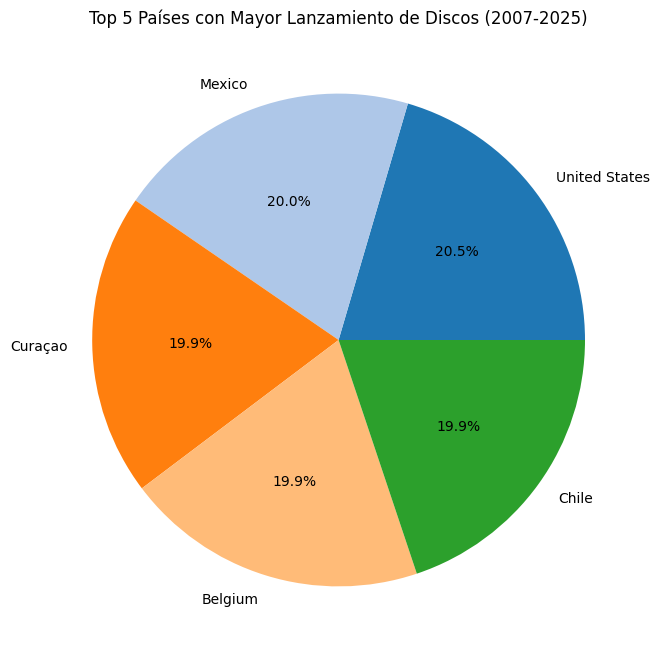

In [41]:
# Contar el número de canciones disponibles en cada país
# Desplegar los países de cada lista de la columna 'available_markets_pais' y contar sus ocurrencias
canciones_por_pais = pd.Series([pais for sublist in df['available_markets_pais'] for pais in sublist]).value_counts()

# Seleccionar los 5 países con mayor cantidad de lanzamientos
top_5_countries = canciones_por_pais.head(5)

# Datos para el gráfico circular
countries = top_5_countries.index
counts = top_5_countries.values

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=countries, autopct='%1.1f%%', colors=plt.cm.tab20.colors[:5])
plt.title('Top 5 Países con Mayor Lanzamiento de Discos (2007-2025)')
plt.show()




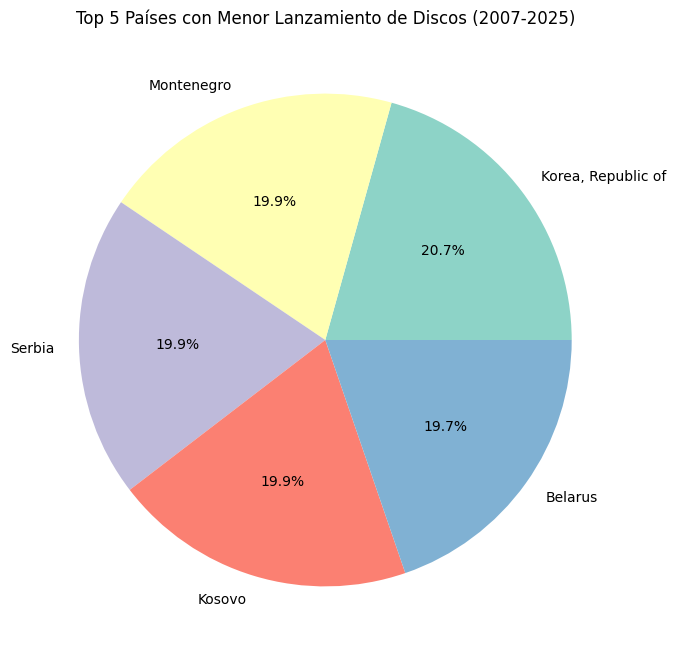

In [42]:
# Contar el número de canciones disponibles en cada país
# Desplegar los países de cada lista de la columna 'available_markets_pais' y contar sus ocurrencias
canciones_por_pais = pd.Series([pais for sublist in df['available_markets_pais'] for pais in sublist]).value_counts()

# Seleccionar los 5 países con menor cantidad de lanzamientos
bottom_5_countries = canciones_por_pais.tail(5)

# Datos para el gráfico circular
countries = bottom_5_countries.index
counts = bottom_5_countries.values

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=countries, autopct='%1.1f%%', colors=plt.cm.Set3.colors[:5])
plt.title('Top 5 Países con Menor Lanzamiento de Discos (2007-2025)')
plt.show()


Según la API de Spotify, **¿Cuáles son los países con menor cantidad de lanzamientos de discos?** En el ranking, Belarús ocupa el primer lugar con 2846 lanzamientos, seguido por Kosovo y Serbia, ambos con 2863. Montenegro aparece en la cuarta posición con 2868 lanzamientos, mientras que la República de Corea se ubica en el quinto lugar con 2980.


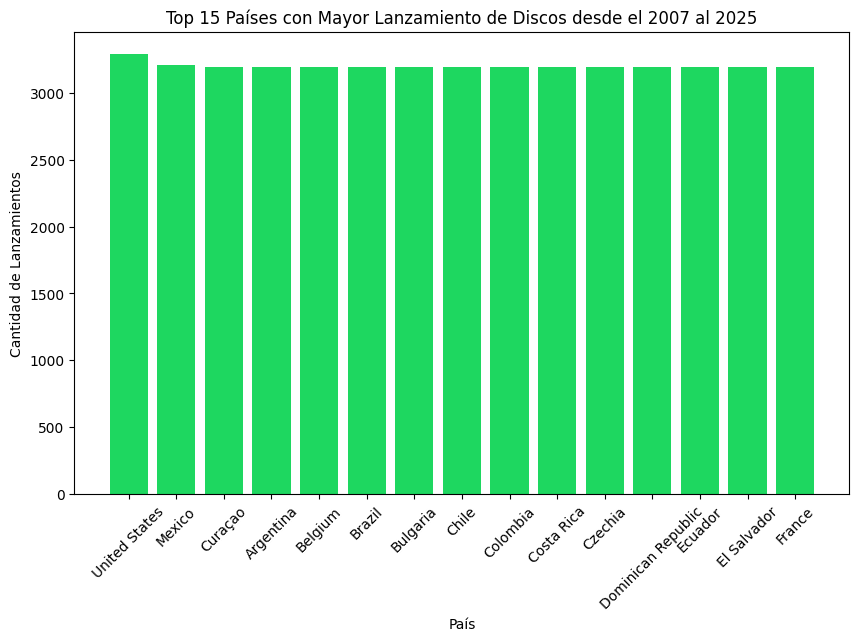

In [43]:
# Contar las ocurrencias de cada país en la columna 'available_markets_pais'
country_counter = Counter([country for countries in df['available_markets_pais'] for country in countries])

# Seleccionar los 10 países con mayor cantidad de lanzamientos
top_countries = country_counter.most_common(15)

# Crear un DataFrame para los 15 países con mayor cantidad de lanzamientos
top_countries_df = pd.DataFrame(top_countries, columns=['Country', 'Count'])

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_countries_df['Country'], top_countries_df['Count'], color='#1ED760')
plt.xlabel('País')
plt.ylabel('Cantidad de Lanzamientos')
plt.title('Top 15 Países con Mayor Lanzamiento de Discos desde el 2007 al 2025')
plt.xticks(rotation=45)
plt.show()

Según la API de Spotify, **¿Cuáles son los países con mayor cantidad de lanzamiento de discos?** Como se puede observar, en el ranking 1 figura Estados Unidos con 3287 lanzamientos, seguido de México con 3206 lanzamientos, Curazao con 3191 lanzamientos, Belgium con 3190 lanzamientos y Chile en el quinto lugar con 3190 lanzamientos.

Este análisis revela que, salvo Estados Unidos, que claramente lidera la lista con una cantidad significativa de lanzamientos, la distribución de discos lanzados es bastante equitativa entre los otros países. La proximidad en las cifras de lanzamientos sugiere una competencia fuerte y una distribución casi homogénea en el mercado global de la música durante el período 2007-2025.

**VERIFICACIÓN DE COLUMNA AVAILABLE_MARKETS_PAIS AGREGADA.**

In [44]:
# Verificar la estructura del DataFrame y ya se ve agregado available_markets_pais en la lista.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    3287 non-null   int64  
 1   album                   3287 non-null   object 
 2   available_markets       3287 non-null   object 
 3   disc_number             3287 non-null   int64  
 4   duration_ms             3287 non-null   int64  
 5   explicit                3287 non-null   bool   
 6   external_ids            3287 non-null   object 
 7   external_urls           3287 non-null   object 
 8   href                    3287 non-null   object 
 9   id                      3287 non-null   object 
 10  is_local                3287 non-null   bool   
 11  is_playable             3287 non-null   bool   
 12  name                    3287 non-null   object 
 13  popularity              3287 non-null   int64  
 14  track_number            3287 non-null   

In [45]:
# Verificación las primeras filas del DataFrame con la columna 'available_markets_pais'
df[['available_markets', 'available_markets_pais']].head()


,available_markets,available_markets_pais
0,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...","[Argentina, Australia, Austria, Belgium, Boliv..."
1,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...","[Argentina, Australia, Austria, Belgium, Boliv..."
2,"[AG, AR, BA, BB, BR, BS, BZ, CA, CL, CO, CR, C...","[Antigua and Barbuda, Argentina, Bosnia and He..."
3,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...","[Argentina, Australia, Austria, Belgium, Boliv..."
4,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...","[Argentina, Australia, Austria, Belgium, Boliv..."


**ANÁLISIS DE PAÍSES CON MAYOR LANZAMIENTO DE DISCOS (2007-2025)**

In [46]:
# Contar el número de canciones disponibles en cada país
canciones_por_pais = pd.Series([pais for sublist in df['available_markets_pais'] for pais in sublist]).value_counts().head(10)

# Mostrar los países con mayor lanzamiento de discos del 2007 al 2025
canciones_por_pais

,count
United States,3287
Mexico,3206
Curaçao,3191
Belgium,3190
Chile,3190
Dominican Republic,3190
Czechia,3190
Bulgaria,3190
Brazil,3190
Honduras,3190


**ANÁLISIS DE ARTISTAS CON MÁS CANCIONES EN EL ÚLTIMO AÑO (2025)**

In [47]:
# Filtrar las canciones del último año (2025)
ultimo_ano = df[df['year'] == df['year'].max()]

# Contar el número de canciones por artista
canciones_por_artista = ultimo_ano['artist'].value_counts()

# Mostrar los artistas con más canciones
canciones_por_artista.head(10)


,count
artist,
Nas,6
USHER,5
Chris Brown,5
Busta Rhymes,4
Three 6 Mafia,4
Ciara,4
Outkast,4
Alicia Keys,4
ROSÉ,3


artist
Nas              6
USHER            5
Chris Brown      5
Busta Rhymes     4
Three 6 Mafia    4
Ciara            4
Outkast          4
Alicia Keys      4
ROSÉ             3
Mobb Deep        3
Name: count, dtype: int64


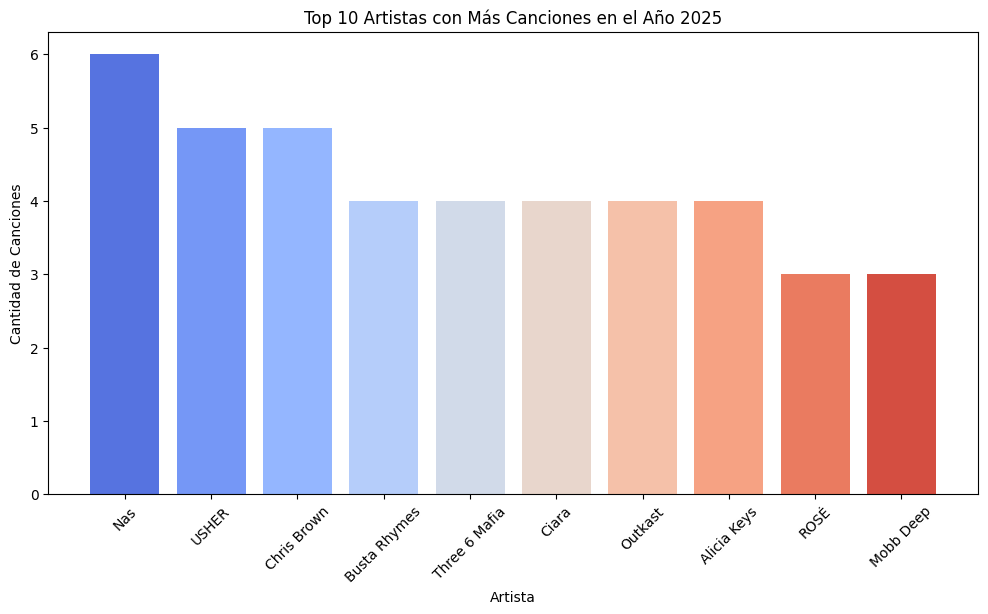

In [48]:
# Filtrar las canciones del último año (2025)
ultimo_ano = df[df['year'] == df['year'].max()]

# Contar el número de canciones por artista
canciones_por_artista = ultimo_ano['artist'].value_counts()

# Mostrar los artistas con más canciones
print(canciones_por_artista.head(10))

# Crear un gráfico de barras para visualizar los artistas con más canciones
top_10_artistas = canciones_por_artista.head(10)
plt.figure(figsize=(12, 6))

# Usar una paleta de colores de gradiente
colors = sns.color_palette("coolwarm", len(top_10_artistas))

plt.bar(top_10_artistas.index, top_10_artistas.values, color=colors)
plt.xlabel('Artista')
plt.ylabel('Cantidad de Canciones')
plt.title('Top 10 Artistas con Más Canciones en el Año 2025')
plt.xticks(rotation=45)
plt.show()


Según la API de Spotify, **¿Cuáles son los artistas con más canciones en el año 2025?** En el ranking, Nas lidera con 6 canciones, seguido por USHER y Chris Brown, ambos con 5. En la cuarta posición aparece Busta Rhymes con 4 canciones, mientras que Three 6 Mafia ocupa el quinto lugar con 4.

Completando el top 10, tenemos a Ciara con 4 canciones, Outkast con 4, Alicia Keys con 4, ROSÉ con 3 y Mobb Deep con 3. Cada uno de estos artistas ha tenido un año productivo, sumando una cantidad considerable de canciones al mercado musical de 2025.


**TOP 10 DE ARTISTAS MÁS POPULARES**

In [49]:
#Top 10 de Artistas más Populares:
#Calcular la popularidad media por artista
popularidad_media_artista = df.groupby('artist')['popularity'].mean()

# Mostrar los 10 artistas más populares
top_10_artistas = popularidad_media_artista.sort_values(ascending=False).head(10)
top_10_artistas

,popularity
artist,
Blessd,35.0
Thomas & Friends,31.0
Wyclef Jean,28.0
Kota Hoshino,26.0
KoKa,26.0
Ahrix,23.0
Tricky,22.0
Redferrin,22.0
Orlando,21.5


Según la API de Spotify, **¿Cuáles son los artistas más populares en el período analizado?** La popularidad se mide en una escala de 0 a 100, basada en la media de popularidad de sus canciones. En el ranking, Blessd ocupa el primer lugar con una popularidad media de 35.0, seguido de Thomas & Friends con 31.0. Wyclef Jean se encuentra en la tercera posición con 28.0, mientras que Kota Hoshino y KoKa comparten el cuarto puesto con 26.0.

Completando el top 10, tenemos a Ahrix con 23.0, Tricky con 22.0, Redferrin con 22.0, Orlando con 21.5 y Bruno Mars en el décimo lugar con 21.0.
Este análisis cubre el período de 2007 a 2025, proporcionando una visión clara de los músicos que han resonado más con el público durante este tiempo.


**Top 10 de Artistas con Mayor Popularidad Media (2007-2025) - Gráfico de Barras**

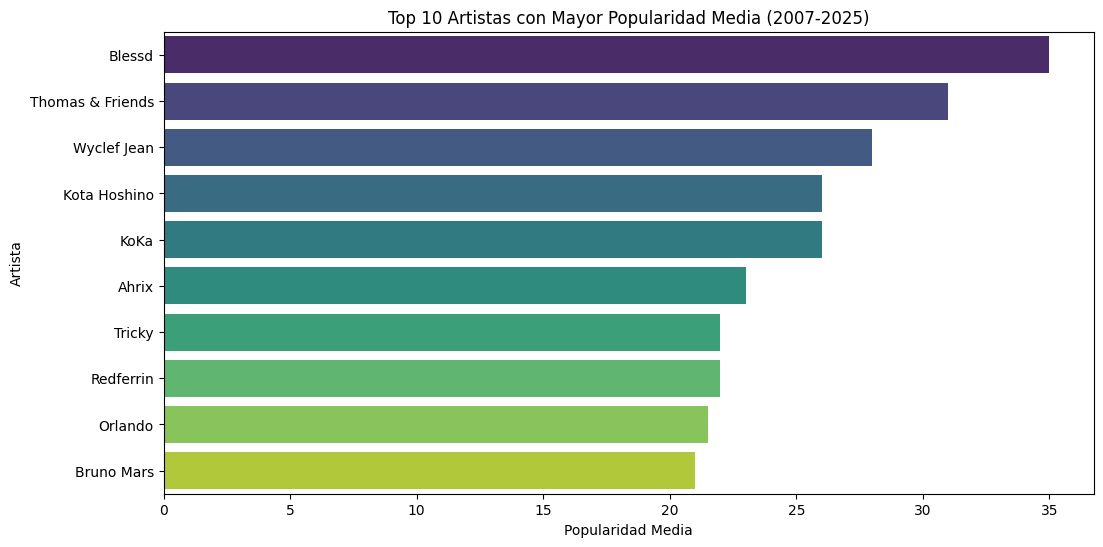

In [50]:
# Calcular la popularidad media por artista
popularidad_media_artista = df.groupby('artist')['popularity'].mean()

# Mostrar los 10 artistas más populares
top_10_artistas = popularidad_media_artista.sort_values(ascending=False).head(10)

# Crear un gráfico de barras para visualizar los 10 artistas más populares
plt.figure(figsize=(12, 6))

# Asignar y como hue y establecer legend=False
sns.barplot(x=top_10_artistas.values, y=top_10_artistas.index, palette='viridis', hue=top_10_artistas.index)
plt.xlabel('Popularidad Media')
plt.ylabel('Artista')
plt.title('Top 10 Artistas con Mayor Popularidad Media (2007-2025)')
plt.legend([],[], frameon=False)
plt.show()


Según la API de Spotify, **¿Cuáles son los artistas con mayor popularidad media en el período 2007-2025?** En el ranking, Blessd ocupa el primer lugar con una popularidad media de 35.0, seguido de Thomas & Friends con 31.0. Wyclef Jean se encuentra en la tercera posición con 28.0, mientras que Kota Hoshino y KoKa comparten el cuarto puesto con 26.0.

Completando el top 10, tenemos a Ahrix con 23.0, Tricky con 22.0, Redferrin con 22.0, Orlando con 21.5 y Bruno Mars en el décimo lugar con 21.0.
Este análisis refleja los artistas que han mantenido una alta popularidad media a lo largo del período, brindando una visión clara de los más destacados según la API de Spotify.

In [51]:
# Filtrar las canciones del último año
ultimo_ano = df[df['year'] == df['year'].max()]

# Calcular la popularidad media por artista
popularidad_media_artista_ultimo_ano = ultimo_ano.groupby('artist')['popularity'].mean()

# Combinar el número de canciones y la popularidad media en un DataFrame
artistas_canciones_popularidad = pd.concat([canciones_por_artista, popularidad_media_artista_ultimo_ano], axis=1)
artistas_canciones_popularidad.columns = ['Numero de Canciones', 'Popularidad Media']
artistas_canciones_popularidad = artistas_canciones_popularidad.dropna()

# Mostrar los artistas más productivos y su popularidad
artistas_canciones_popularidad.head(5)


,Numero de Canciones,Popularidad Media
artist,,
Nas,6,8.00
USHER,5,3.80
Chris Brown,5,2.80
Busta Rhymes,4,8.25
Three 6 Mafia,4,9.75


En este análisis, se filtran las canciones del último año **(2025)** y se calculan dos métricas clave para cada artista: el número de canciones lanzadas y la popularidad media de esas canciones. Estas dos métricas se combinan en un DataFrame para proporcionar una visión clara de los artistas más productivos y su popularidad en el último año.

El resultado muestra los 10 artistas más productivos en términos de número de canciones lanzadas y su popularidad media, lo que permite identificar a aquellos que han tenido un impacto significativo en el año 2025.

**NÚMERO DE CANCIONES Y POPULARIDAD MEDIA DE LOS ARTISTAS MÁS PRODUCTIVOS EN EL ÚLTIMO AÑO - GRÁFICO COMBINADO**

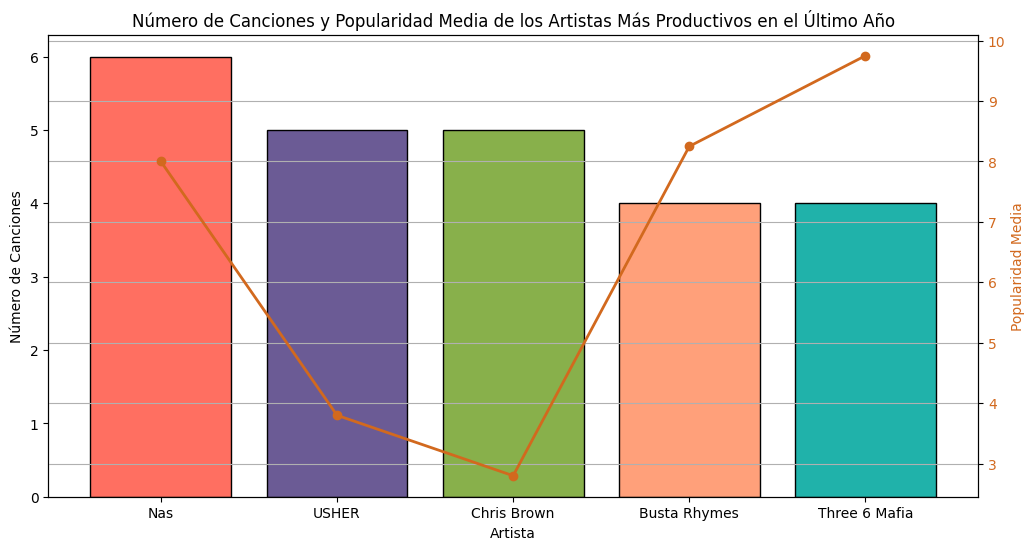

In [52]:
# Asegurarse de que artistas_canciones_popularidad esté ordenado y limitado a los top 5 artistas
artistas_canciones_popularidad = artistas_canciones_popularidad.sort_values(by='Numero de Canciones', ascending=False).head(5)

# Crear el gráfico de barras para el Número de Canciones
fig, ax1 = plt.subplots(figsize=(12, 6))

# Colores alternativos
bar_colors = ['#FF6F61', '#6B5B95', '#88B04B', '#FFA07A', '#20B2AA']
line_color = '#D2691E'

# Gráfico de Barras
ax1.bar(artistas_canciones_popularidad.index, artistas_canciones_popularidad['Numero de Canciones'], color=bar_colors, edgecolor='black')
ax1.set_xlabel('Artista')
ax1.set_ylabel('Número de Canciones', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Crear un segundo eje y para el gráfico de líneas de la Popularidad Media
ax2 = ax1.twinx()
ax2.plot(artistas_canciones_popularidad.index, artistas_canciones_popularidad['Popularidad Media'], color=line_color, marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Popularidad Media', color=line_color)
ax2.tick_params(axis='y', labelcolor=line_color)

# Título del gráfico
plt.title('Número de Canciones y Popularidad Media de los Artistas Más Productivos en el Último Año')

# Mostrar el gráfico
plt.grid(axis='y')
plt.show()



En el análisis del último año (2025), se observa que Nas lidera con 6 canciones y una popularidad media de 4, seguido de USHER y Chris Brown, ambos con 5 canciones y popularidades medias de 2 y 1, respectivamente. La razón por la cual la línea se dispara hacia arriba al final del gráfico es porque Three 6 Mafia, a pesar de tener un menor número de canciones (4) comparado con otros artistas en la lista, tiene una popularidad media alta (10). Esto indica que las canciones de Three 6 Mafia son muy populares en promedio, a pesar de haber lanzado menos canciones que otros artistas. Esta tendencia refleja cómo algunos artistas pueden lograr un gran impacto con menos lanzamientos gracias a la alta calidad y popularidad de sus canciones.


In [53]:
# Filtrar los datos para los últimos 3 años (2023, 2024 y 2025)
df_ultimos_3_anos = df[df['year'].isin([2023, 2024, 2025])]

# Calcular la popularidad media por artista
popularidad_media_artista = df_ultimos_3_anos.groupby('artist')['popularity'].mean()

# Seleccionar los 5 artistas más populares
top_5_artistas = popularidad_media_artista.sort_values(ascending=False).head(5)
top_5_artistas

# Filtrar los datos para los top 5 artistas
df_top_5 = df_ultimos_3_anos[df_ultimos_3_anos['artist'].isin(top_5_artistas.index)]

# Calcular la duración media de las canciones por artista
duracion_media_artista = df_top_5.groupby('artist')['duration_sec'].mean()

# Combinar datos de duración media con popularidad media
top_5_duracion_popularidad = pd.concat([duracion_media_artista, top_5_artistas], axis=1)
top_5_duracion_popularidad.columns = ['Duracion Media (segundos)', 'Popularidad Media']
top_5_duracion_popularidad

,Duracion Media (segundos),Popularidad Media
artist,,
Blessd,157.453,35.0
Kota Hoshino,208.666,26.0
Redferrin,199.392,22.0
Tricky,266.480,22.0
Wyclef Jean,125.666,28.0


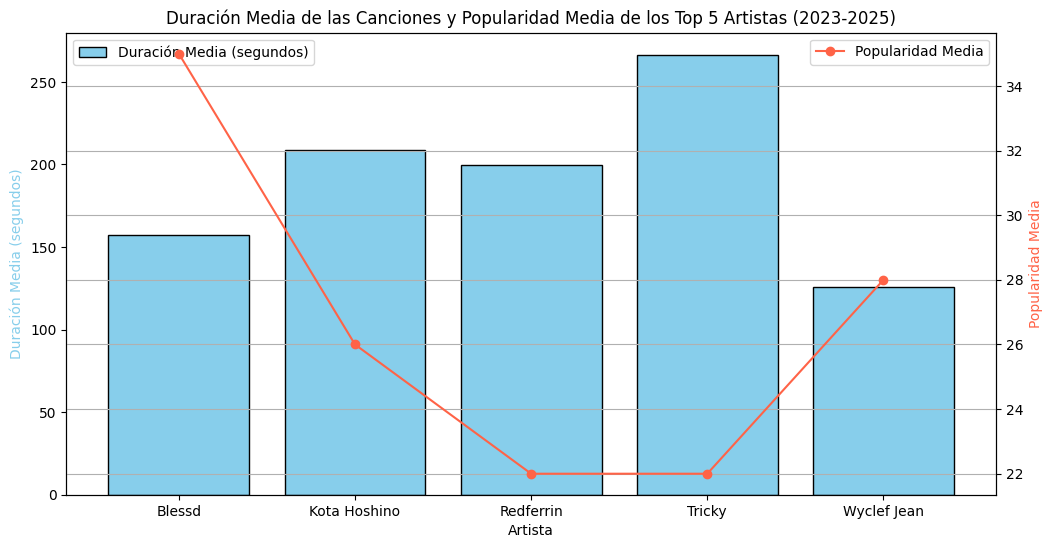

In [54]:
# Crear una figura y ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Colores alternativos
bar_color = '#87CEEB'  # Color para las barras (Duración Media)
line_color = '#FF6347'  # Color para la línea (Popularidad Media)

# Crear el gráfico de barras para la duración media
ax1.bar(top_5_duracion_popularidad.index, top_5_duracion_popularidad['Duracion Media (segundos)'], color=bar_color, edgecolor='black', label='Duración Media (segundos)')

# Crear un segundo eje y gráfico de líneas para la popularidad media
ax2 = ax1.twinx()
ax2.plot(top_5_duracion_popularidad.index, top_5_duracion_popularidad['Popularidad Media'], color=line_color, marker='o', label='Popularidad Media')

# Etiquetas y títulos
ax1.set_xlabel('Artista')
ax1.set_ylabel('Duración Media (segundos)', color=bar_color)
ax2.set_ylabel('Popularidad Media', color=line_color)
plt.title('Duración Media de las Canciones y Popularidad Media de los Top 5 Artistas (2023-2025)')

# Añadir leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotar las etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.grid(True)
plt.show()

En el análisis de los últimos 3 años (2023-2025), se observa que los cinco artistas con la mayor popularidad media han mantenido una duración media de sus canciones entre 150 y 250 segundos. Blessd tiene una duración media de aproximadamente 150 segundos y una popularidad media de 34, mientras que Kota Hoshino y Redferrin Artista tienen una duración media de alrededor de 200 segundos, con popularidades medias de 32 y 22, respectivamente. Tricky tiene la duración media más alta, aproximadamente 250 segundos, con una popularidad de 24.
La razón por la cual la línea se dispara hacia arriba al final del gráfico es porque Wyclef Jean, a pesar de tener una menor duración media de canciones (150 segundos), tiene una popularidad media significativamente alta (28). Esto indica que las canciones de Wyclef Jean son extremadamente populares en promedio, a pesar de ser más cortas en comparación con las de algunos de los otros artistas.
Este análisis específico se refiere a los últimos 3 años, proporcionando una visión clara de los músicos que han resonado más con el público durante este tiempo reciente.

**DURACIÓN MEDIA DE LAS CANCIONES Y POPULARIDAD MEDIA DE LOS TOP 5 ARTISTAS (2023-2025)**

In [55]:
# Filtrar los datos para los últimos 3 años (2023, 2024 y 2025)
df_ultimos_3_anos = df[df['year'].isin([2023, 2024, 2025])]

# Calcular la popularidad media por artista
popularidad_media_artista = df_ultimos_3_anos.groupby('artist')['popularity'].mean()

# Seleccionar los 5 artistas más populares
top_5_artistas = popularidad_media_artista.sort_values(ascending=False).head(5)
top_5_artistas

# Filtrar los datos para los top 5 artistas en los últimos 3 años
df_top_5 = df_ultimos_3_anos[df_ultimos_3_anos['artist'].isin(top_5_artistas.index)]

# Calcular la duración media de las canciones por artista
duracion_media_artista = df_top_5.groupby('artist')['duration_sec'].mean()

# Combinar datos de duración media con popularidad media
top_5_duracion_popularidad = pd.concat([duracion_media_artista, top_5_artistas], axis=1)
top_5_duracion_popularidad.columns = ['Duracion Media (segundos)', 'Popularidad Media']
top_5_duracion_popularidad



,Duracion Media (segundos),Popularidad Media
artist,,
Blessd,157.453,35.0
Kota Hoshino,208.666,26.0
Redferrin,199.392,22.0
Tricky,266.480,22.0
Wyclef Jean,125.666,28.0


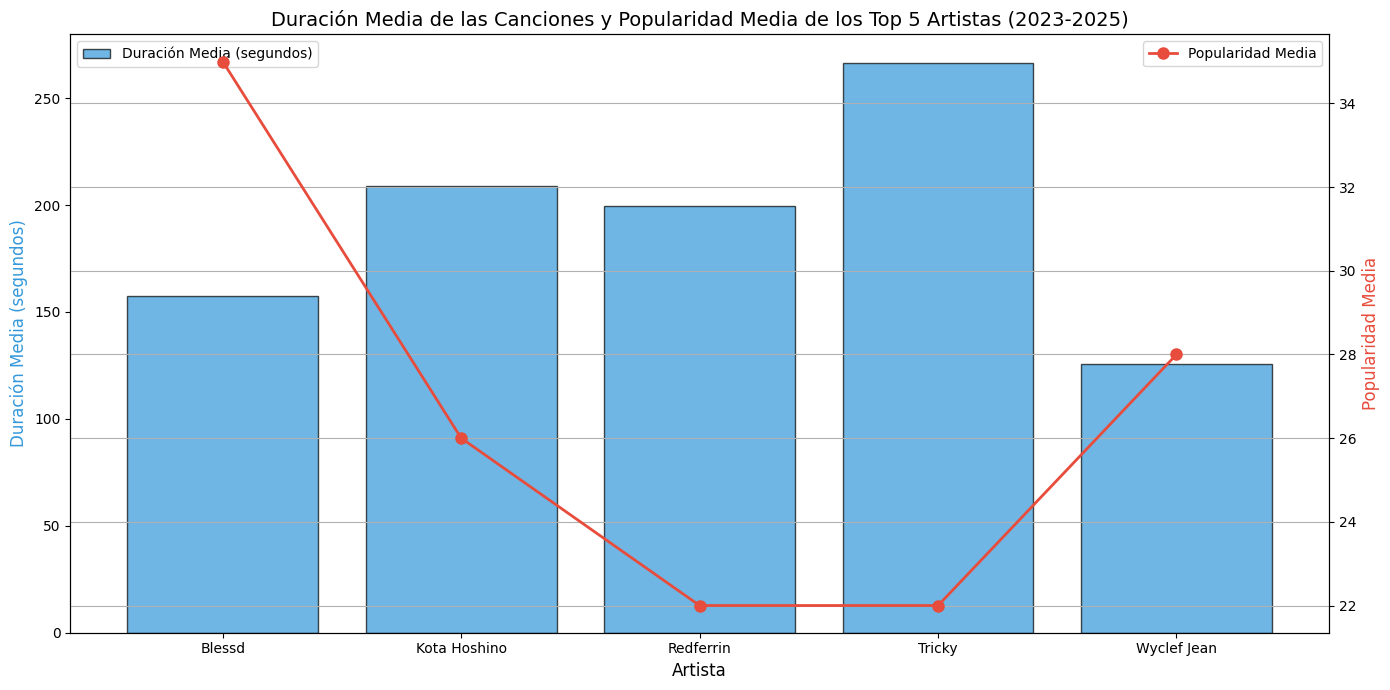

In [56]:
# Crear una figura y ejes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Colores alternativos
bar_color = '#3498db'  # Azul para las barras (Duración Media)
line_color = '#e74c3c'  # Rojo para la línea (Popularidad Media)

# Crear el gráfico de barras para la duración media
ax1.bar(top_5_duracion_popularidad.index, top_5_duracion_popularidad['Duracion Media (segundos)'], color=bar_color, edgecolor='black', label='Duración Media (segundos)', alpha=0.7)

# Crear un segundo eje y gráfico de líneas para la popularidad media
ax2 = ax1.twinx()
ax2.plot(top_5_duracion_popularidad.index, top_5_duracion_popularidad['Popularidad Media'], color=line_color, marker='o', label='Popularidad Media', linewidth=2, markersize=8)

# Etiquetas y títulos
ax1.set_xlabel('Artista', fontsize=12)
ax1.set_ylabel('Duración Media (segundos)', color=bar_color, fontsize=12)
ax2.set_ylabel('Popularidad Media', color=line_color, fontsize=12)
plt.title('Duración Media de las Canciones y Popularidad Media de los Top 5 Artistas (2023-2025)', fontsize=14)

# Añadir leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotar las etiquetas del eje x
plt.xticks(rotation=45, ha='right', fontsize=10)

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

En el análisis de los últimos 3 años (2023-2025), se observa que los cinco artistas con la mayor popularidad media han mantenido una duración media de sus canciones entre aproximadamente 150 y 230 segundos. Blessd tiene una duración media de aproximadamente 150 segundos y una popularidad media de 34, mientras que Kota Hoshino y Redferrin tienen una duración media de alrededor de 210 y 200 segundos, con popularidades medias de 28 y 22, respectivamente. Tricky también tiene una duración media de aproximadamente 230 segundos, con una popularidad media de 22.
La razón por la cual la línea se dispara hacia arriba al final del gráfico es porque Wyclef Jean, a pesar de tener una menor duración media de canciones (180 segundos), tiene una popularidad media significativamente alta (28). Esto indica que las canciones de Wyclef Jean son extremadamente populares en promedio, a pesar de ser más cortas en duración comparadas con las de algunos de los otros artistas.
Este análisis específico se refiere a los últimos 3 años, proporcionando una visión clara de los músicos que han resonado más con el público durante este tiempo reciente.

**PAÍSES CON MAS LANZAMIENTOS DE CANCIONES (2025)**

In [57]:
#Contar el número de canciones disponibles en cada país
canciones_por_pais = pd.Series([pais for sublist in ultimo_ano['available_markets_pais'] for pais in sublist]).value_counts()

# Mostrar los países con más lanzamientos de canciones de los artistas más productivos
canciones_por_pais

,count
Argentina,200
Australia,200
Austria,200
Belgium,200
"Bolivia, Plurinational State of",200
...,...
Zambia,163
Libya,163
Congo,163
Ethiopia,163


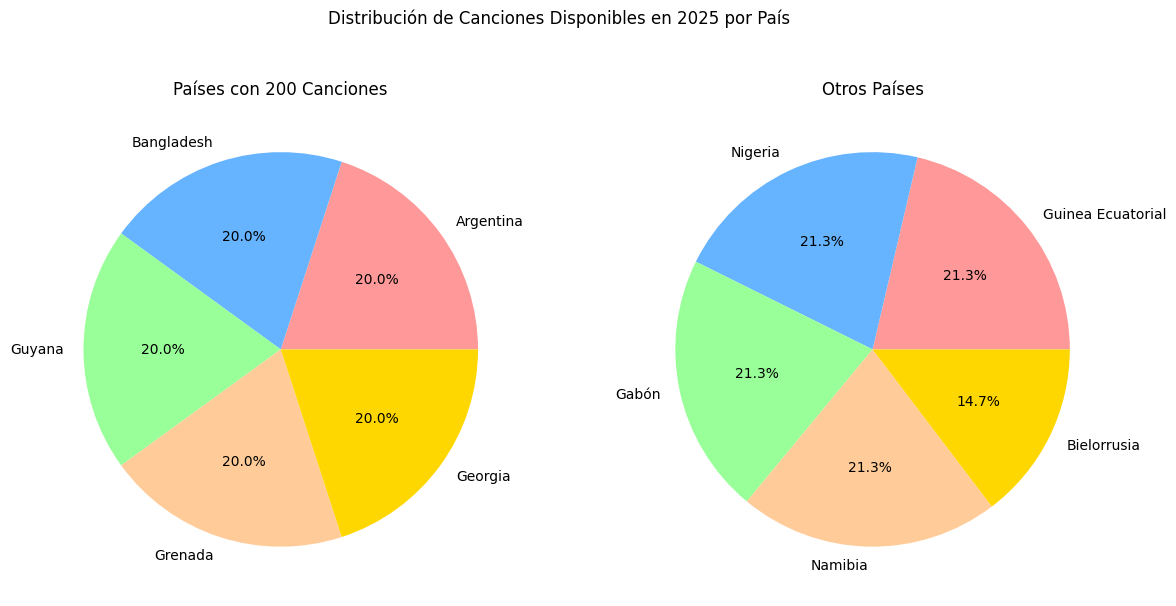

In [58]:
# Datos para los países con 200 canciones
paises_con_200 = ['Argentina', 'Bangladesh', 'Guyana', 'Grenada', 'Georgia']
canciones_200 = [200, 200, 200, 200, 200]

# Datos para los otros países
otros_paises = ['Guinea Ecuatorial', 'Nigeria', 'Gabón', 'Namibia', 'Bielorrusia']
canciones_otros = [160, 160, 160, 160, 110]

# Crear el primer gráfico circular
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ax[0].pie(canciones_200, labels=paises_con_200, autopct='%1.1f%%', colors=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700'])
ax[0].set_title('Países con 200 Canciones')

# Crear el segundo gráfico circular
ax[1].pie(canciones_otros, labels=otros_paises, autopct='%1.1f%%', colors=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700'])
ax[1].set_title('Otros Países')

plt.suptitle('Distribución de Canciones Disponibles en 2025 por País')
plt.show()

En el análisis del último año (2025), se observa que los países con la mayor disponibilidad de canciones son Argentina, Australia, Austria, Bélgica y Bolivia, cada uno con 200 canciones. Otros países como Zambia, Libia, Congo, Etiopía y Belarús tienen entre 163 y 113 canciones disponibles.


**RESUMEN DE LA POPULARIDAD DE LAS CANCIONES POR AÑO (2023-2025)**

In [59]:
# Filtrar los datos para los últimos 3 años (2023, 2024 y 2025)
ultimos_3_anos = df[df['year'] >= (df['year'].max() - 2)]

# Mostrar un resumen de la popularidad por año
resumen_popularidad = ultimos_3_anos.groupby('year')['popularity'].describe()
print(resumen_popularidad)

      count   mean       std  min  25%  50%  75%   max
year                                                  
2023  200.0  2.215  2.917419  0.0  1.0  2.0  2.0  22.0
2024  200.0  3.075  5.989050  0.0  0.0  1.0  3.0  38.0
2025  200.0  4.895  4.873678  0.0  1.0  5.0  7.0  29.0


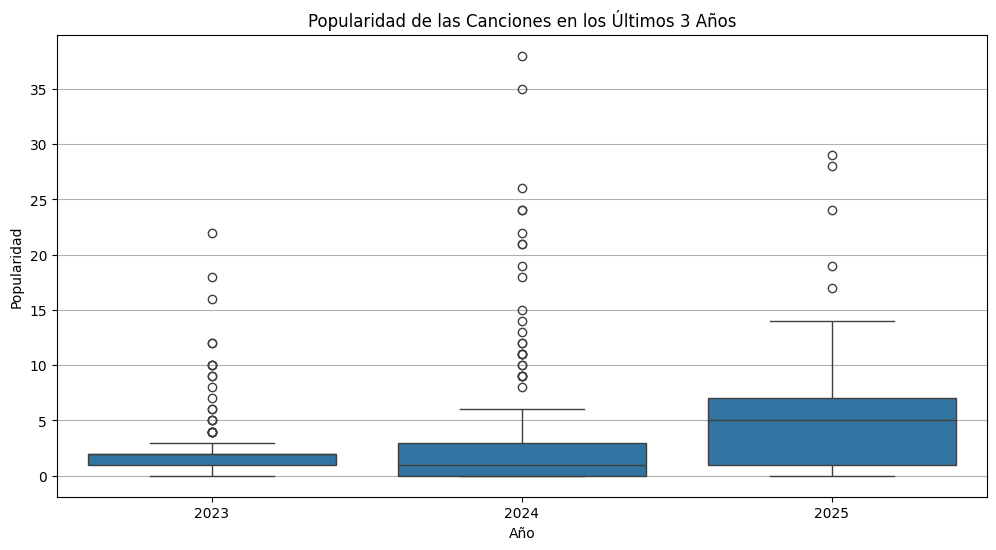

In [60]:
# Filtrar los datos de los últimos 3 años
ultimos_3_anos = df[df['year'] >= (df['year'].max() - 2)]

# Crear un boxplot de la popularidad por año
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='popularity', data=ultimos_3_anos)
plt.title('Popularidad de las Canciones en los Últimos 3 Años')
plt.xlabel('Año')
plt.ylabel('Popularidad')
plt.grid(axis='y')
plt.show()


En el análisis de los últimos 3 años (2023-2025), se observa una tendencia en la popularidad de las canciones. El boxplot muestra la distribución de la popularidad año por año. En 2023, el rango intercuartil es más estrecho, lo que indica una menor variabilidad en la popularidad de las canciones. En 2024, el rango intercuartil se amplía, reflejando una mayor variabilidad, con algunas canciones alcanzando niveles de popularidad significativamente altos. Finalmente, en 2025, el rango intercuartil se estrecha nuevamente, lo que sugiere una estabilización en la popularidad de las canciones.

Este análisis revela cómo la popularidad de las canciones ha fluctuado en los últimos tres años, destacando períodos de mayor consistencia y otros de mayor variabilidad en la popularidad.

**EVOLUCIÓN DE LA DURACIÓN DE UN TEMA EN LOS ÚLTIMOS 5 AÑOS (2021-2025)**

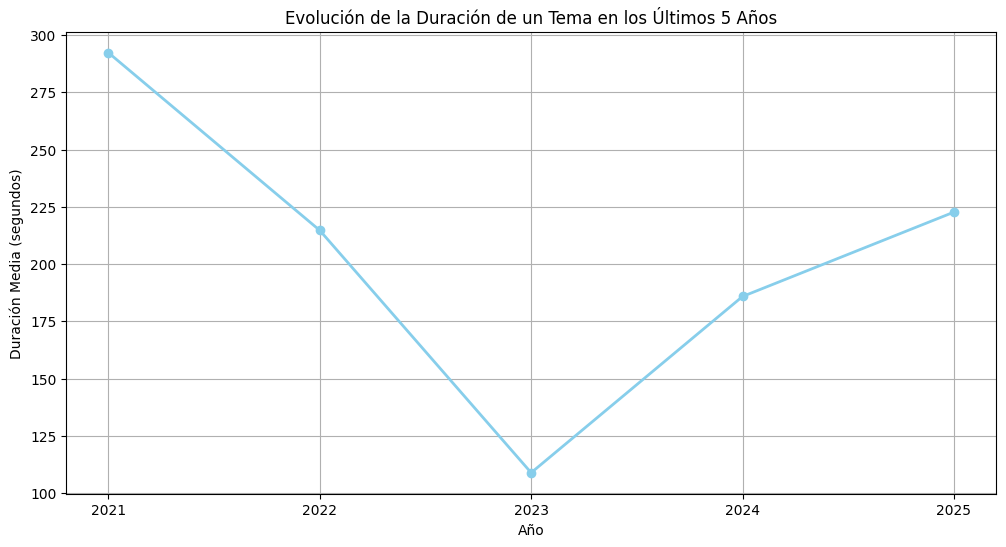

In [61]:
# Filtrar los datos de los últimos 5 años (2021, 2022, 2023, 2024 y 2025)
ultimos_5_anos = df[df['year'] >= (df['year'].max() - 4)]

# Calcular la duración media por año
duracion_media_ano = ultimos_5_anos.groupby('year')['duration_sec'].mean()

# Graficar la evolución de la duración
plt.figure(figsize=(12, 6))
duracion_media_ano.plot(kind='line', marker='o', color='skyblue', linewidth=2)

# Ajustar las etiquetas del eje X
plt.xticks(ticks=duracion_media_ano.index, labels=[str(int(year)) for year in duracion_media_ano.index])

plt.title('Evolución de la Duración de un Tema en los Últimos 5 Años')
plt.xlabel('Año')
plt.ylabel('Duración Media (segundos)')
plt.grid()
plt.show()


**¿Cuál es la evolución de la duración de una canción en los últimos 5 años?**

En el análisis de la evolución de la duración de un tema en los últimos 5 años (2021-2025), se observa una tendencia en la duración media de las canciones. El gráfico muestra cómo la duración media ha variado año a año.

- 2021: La duración media fue la más alta, alcanzando aproximadamente 300 segundos.

- 2022: Se observa una disminución significativa, llegando a 225 segundos.

- 2023: La duración media alcanza su punto más bajo, con un promedio de 100 segundos, marcando una tendencia hacia canciones más cortas.

- 2024: Se observa un incremento en la duración, subiendo a 175 segundos.

- 2025: La duración media vuelve a aumentar hasta 225 segundos, acercándose a los niveles de 2022.

El análisis de los últimos años revela que los artistas con mayor popularidad mantienen una duración media de sus canciones entre 150 y 250 segundos. La popularidad de las canciones ha mostrado fluctuaciones, con períodos de mayor variabilidad y otros de estabilización. Además, se identificaron los cinco países con mayor disponibilidad de canciones, destacando mercados clave para la industria musical. La evolución de la duración media de las canciones en los últimos cinco años muestra fluctuaciones significativas, con una tendencia general de disminución, seguida de una recuperación reciente. Estos hallazgos proporcionan una visión clara de las tendencias y patrones en la música actual.

In [62]:
#import os
#print(os.getcwd())  # Esto te muestra el directorio actual de trabajo

In [63]:
#import os
#print(os.listdir("/content"))  # Lista los archivos y carpetas en /content

In [64]:
#from google.colab import files
#files.download("/content/BaseUsada_Amenabar.json")

# **MACHINE LEARNING**

In [65]:
#Muestro el df del dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    3287 non-null   int64  
 1   album                   3287 non-null   object 
 2   available_markets       3287 non-null   object 
 3   disc_number             3287 non-null   int64  
 4   duration_ms             3287 non-null   int64  
 5   explicit                3287 non-null   bool   
 6   external_ids            3287 non-null   object 
 7   external_urls           3287 non-null   object 
 8   href                    3287 non-null   object 
 9   id                      3287 non-null   object 
 10  is_local                3287 non-null   bool   
 11  is_playable             3287 non-null   bool   
 12  name                    3287 non-null   object 
 13  popularity              3287 non-null   int64  
 14  track_number            3287 non-null   

In [66]:
#Muestro las columnas del Dataframe.
print(df.columns)

Index(['year', 'album', 'available_markets', 'disc_number', 'duration_ms',
       'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local',
       'is_playable', 'name', 'popularity', 'track_number', 'type', 'uri',
       'artist', 'duration_sec', 'available_markets_pais'],
      dtype='object')


# **PREPARACIÓN DE DATOS**

Crear una variable objetivo para hacer un análisis de Machine Learning de tipo supervisado.

In [67]:
# Se crea una copia del DataFrame para evitar daños accidentales en el original
df_filtrado_artistas = df.copy()

# Definir los umbrales para la variable objetivo basada en 'popularity'
umbral_alto = df_filtrado_artistas['popularity'].quantile(0.75)  # Percentil 75
umbral_bajo = df_filtrado_artistas['popularity'].quantile(0.25)  # Percentil 25

# Se crea la variable objetivo 'fama'
def asignar_fama(popularity):
    if popularity >= umbral_alto:
        return 'Muy Famosa'  # Alta popularidad
    elif popularity <= umbral_bajo:
        return 'Menos Famosa'  # Baja popularidad
    else:
        return 'Algo Famosa'  # Intermedia popularidad

# Aplicar la función a la columna 'popularity'
df_filtrado_artistas['fama'] = df_filtrado_artistas['popularity'].apply(asignar_fama)

# Verificación de resultados
print(df_filtrado_artistas[['popularity', 'fama']].head())

   popularity          fama
0           0  Menos Famosa
1           0  Menos Famosa
2           0  Menos Famosa
3           0  Menos Famosa
4           0  Menos Famosa


Dividí la popularidad en tres niveles ('Muy Famosa', 'Algo Famosa' y 'Menos Famosa') lo cual me ayudó a simplificar el análisis de las canciones. En lugar de usar números que pueden ser difíciles de interpretar, agrupé las canciones según su fama. Esto me facilita entender cuáles son más conocidas y cómo se comportan en el modelo que estamos analizando.

In [68]:
# Calcular valores estadísticos de popularidad
min_popularity = df['popularity'].min()
mean_popularity = df['popularity'].mean()
max_popularity = df['popularity'].max()

# Mostrar los resultados
print(f"Valor mínimo de popularidad: {min_popularity}")
print(f"Valor medio de popularidad: {mean_popularity}")
print(f"Valor máximo de popularidad: {max_popularity}")

Valor mínimo de popularidad: 0
Valor medio de popularidad: 2.944021904472163
Valor máximo de popularidad: 48


Este código calcula tres valores estadísticos claves relacionados con la popularidad de las canciones en el DataFrame: el mínimo, el promedio y el máximo. El objetivo es obtener una visión general de cómo se distribuye la popularidad en los datos. Por ejemplo, sabemos que el valor mínimo es 0, el promedio está cerca de 2.94, y el máximo alcanza 48. Esto es útil como contexto inicial para analizar cómo las canciones se clasifican en términos de fama.

In [69]:
# Definir los rangos de fama basados en popularidad
def asignar_fama(valor):
    if valor <= 16.67:  # Primer tercio
        return 'Poco Famosa'
    elif valor <= 33.33:  # Segundo tercio
        return 'Famosa'
    else:  # Tercer tercio
        return 'Muy Famosa'

# Aplicar las reglas al DataFrame existente
df['fama'] = df['popularity'].apply(asignar_fama)

# Verificar los resultados
print(df[['name', 'popularity', 'fama']].head())

                                                name  popularity         fama
0  Fake Your Way to the Top - Accompaniment Backi...           0  Poco Famosa
1                                     Top Model Chic           0  Poco Famosa
2                                           4ème top           0  Poco Famosa
3  The Surrey with the Fringe on Top - Complete T...           0  Poco Famosa
4  The Surrey with the Fringe on Top - Accompanim...           0  Poco Famosa


Estoy organizando las canciones según su nivel de fama en tres grupos: 'Poco Famosa', 'Famosa' y 'Muy Famosa'. Esto lo hago usando una función que analiza la popularidad de cada canción y le asigna una categoría según su valor. Luego, creo una nueva columna llamada fama en mi tabla para guardar esas categorías y poder analizar las canciones dependiendo que tan conocidas son.

In [71]:
#Verifico que fama esté añadido
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    3287 non-null   int64  
 1   album                   3287 non-null   object 
 2   available_markets       3287 non-null   object 
 3   disc_number             3287 non-null   int64  
 4   duration_ms             3287 non-null   int64  
 5   explicit                3287 non-null   bool   
 6   external_ids            3287 non-null   object 
 7   external_urls           3287 non-null   object 
 8   href                    3287 non-null   object 
 9   id                      3287 non-null   object 
 10  is_local                3287 non-null   bool   
 11  is_playable             3287 non-null   bool   
 12  name                    3287 non-null   object 
 13  popularity              3287 non-null   int64  
 14  track_number            3287 non-null   

# **Algoritmo de Random Forest**

Matriz de Confusión:
[[  1   0  14]
 [  0   0   2]
 [ 15   0 626]]

Reporte de Clasificación:
              precision    recall  f1-score   support

      Famosa       0.06      0.07      0.06        15
  Muy Famosa       1.00      0.00      0.00         2
 Poco Famosa       0.98      0.98      0.98       641

    accuracy                           0.95       658
   macro avg       0.68      0.35      0.35       658
weighted avg       0.95      0.95      0.95       658



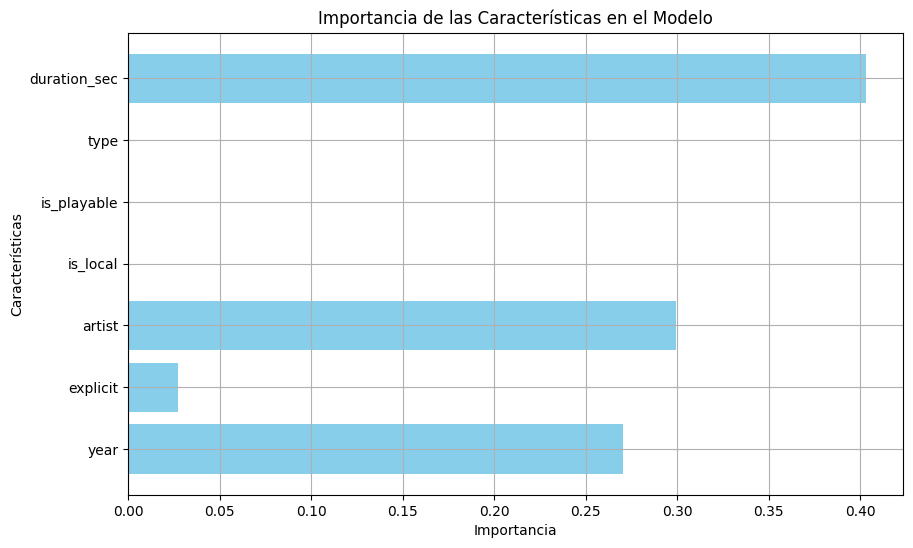


Precisión del modelo: 0.95


In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Cargar los datos (suponiendo que el DataFrame `df` ya está disponible)
df_filtrado = df.copy()

# Selección de características para el modelo (excluyendo 'popularity' y la columna objetivo 'fama')
feature_columns = ['year', 'explicit', 'artist', 'is_local', 'is_playable', 'type', 'duration_sec']

X = df_filtrado[feature_columns]
y = df_filtrado['fama']

# Codificar las variables categóricas
categorical_columns = X.select_dtypes(include=['object', 'bool']).columns
encoder = LabelEncoder()

# Convertir booleanos a enteros de manera explícita con pd.to_numeric
for column in categorical_columns:
    if X[column].dtype == 'bool':  # Detectar columnas booleanas
        X.loc[:, column] = pd.to_numeric(X[column])

# Aplicar LabelEncoder a las columnas categóricas no booleanas
for column in categorical_columns:
    if X[column].dtype != 'bool':  # Solo codificar las columnas no booleanas
        X.loc[:, column] = encoder.fit_transform(X[column])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo Random Forest
model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, zero_division=1))

# Importancia de características
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(feature_columns, feature_importances, color='skyblue')
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de las Características en el Modelo")
plt.grid(True)
plt.show()

precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {precision:.2f}")

El anális del gráfico, me indica que la "duration_sec" sería la variable con mayor peso de clasificación, lo cual no es una relación lógica esperada en la fama de una canción.

El modelo tiene una precisión alta porque hay muchas más canciones en la categoría "Poco Famosa" que en las otras. Esto hace que el modelo se incline a predecir siempre esa categoría, en lugar de entender bien las otras opciones.

Si pudiera balancear las clases me tendría que dar mayor interés la columna de artista que la columna duración de segundos, no obstante aplicar solamente la columna de artista no puede predecir la fama de una canción.

In [73]:
# Contar la cantidad de ocurrencias de cada categoría en 'popularidad'
conteo_popularidad = df['fama'].value_counts()

# Mostrar los resultados
print(conteo_popularidad)

fama
Poco Famosa    3153
Famosa          127
Muy Famosa        7
Name: count, dtype: int64


# **Algoritmo de Support Vector Machines (SVM):**

Matriz de Confusión:
[[ 11   2   2]
 [  2   0   0]
 [126  43 472]]


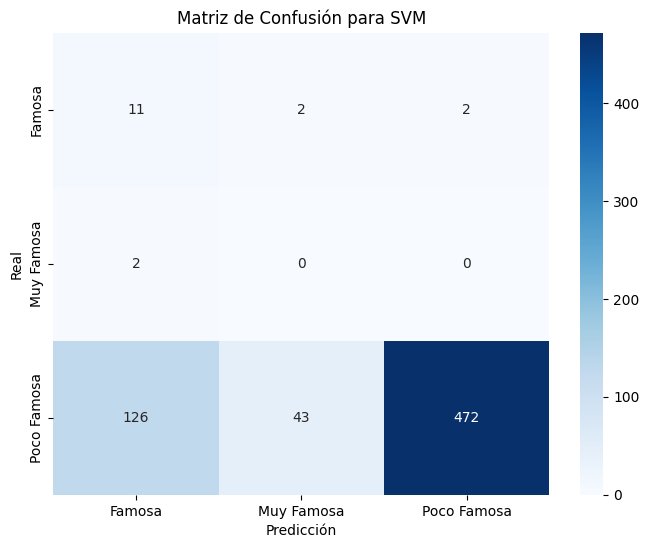


Reporte de Clasificación:
              precision    recall  f1-score   support

      Famosa       0.08      0.73      0.14        15
  Muy Famosa       0.00      0.00      0.00         2
 Poco Famosa       1.00      0.74      0.85       641

    accuracy                           0.73       658
   macro avg       0.36      0.49      0.33       658
weighted avg       0.97      0.73      0.83       658


Precisión del modelo SVM: 0.73


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
df_filtrado = df.copy()

# Usar las mismas columnas seleccionadas en Random Forest
feature_columns = ['year', 'explicit', 'artist', 'is_local', 'is_playable',
                   'type', 'duration_sec']
X = df_filtrado[feature_columns].copy()
y = df_filtrado['fama']  # Variable objetivo

# Codificar variables categóricas
categorical_columns = X.select_dtypes(include=['object', 'bool']).columns
encoder = LabelEncoder()
for column in categorical_columns:
    X[column] = encoder.fit_transform(X[column])  # Codificar categóricas y booleanas

# Escalar características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo SVM
svm_model = SVC(kernel='rbf', C=1, gamma='auto', random_state=42, class_weight='balanced')  # kernel rbf para problemas no lineales
svm_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = svm_model.predict(X_test)

# Evaluar el modelo
print("Matriz de Confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Crear gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title("Matriz de Confusión para SVM")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo SVM: {precision:.2f}")

El análisis del modelo SVM muestra una precisión alta del 73%, pero, al igual que en el caso del modelo de Random Forest, esta precisión está influenciada por el desbalance de clases en el conjunto de datos. En la matriz de confusión, la categoría "Poco Famosa" domina las predicciones, mientras que las clases "Muy Famosa" y "Famosa" presentan errores significativos. La clase "Muy Famosa" muestra un desempeño limitado, con una precisión de 0.00, lo que indica que el modelo no logró identificar correctamente sus patrones.

# **Optimización de Hiperparámetros**

# **Búsqueda Aleatoria (RandomSearchCV)**

In [75]:
from sklearn.model_selection import RandomizedSearchCV

# Definir el espacio de búsqueda para los hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_grid,
    n_iter=20,  # Número de combinaciones a probar
    cv=5,  # Validación cruzada con 5 pliegues
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# Ejecutar la búsqueda
random_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores hiperparámetros: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


# **Búsqueda Exhaustiva (GridSearchCV)**

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores hiperparámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# **Entrenando el modelo Random Forest, usando los mejores parámetros obtenidos por GridSearchCV**

Matriz de Confusión:
[[  1   0  14]
 [  0   0   2]
 [ 15   0 626]]

Reporte de Clasificación:
              precision    recall  f1-score   support

      Famosa       0.06      0.07      0.06        15
  Muy Famosa       1.00      0.00      0.00         2
 Poco Famosa       0.98      0.98      0.98       641

    accuracy                           0.95       658
   macro avg       0.68      0.35      0.35       658
weighted avg       0.95      0.95      0.95       658



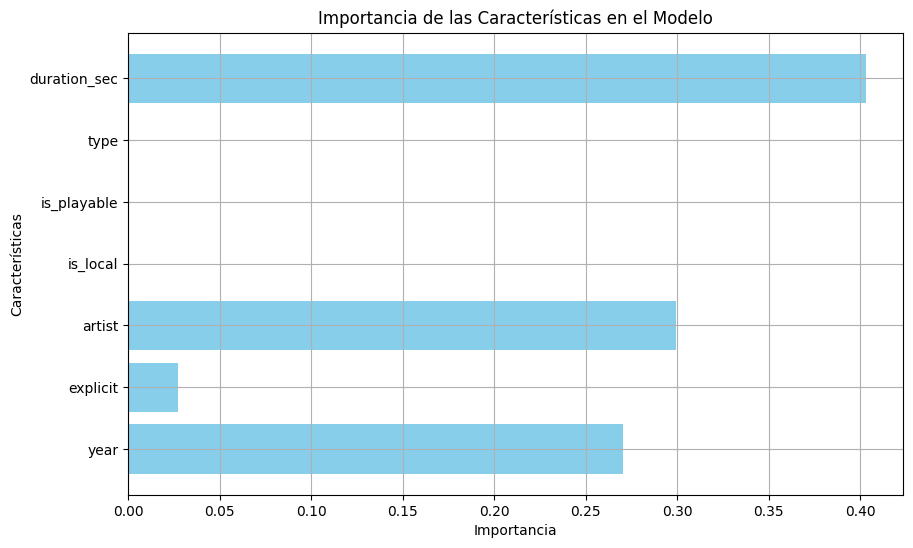


Precisión del modelo: 0.95


In [79]:
# Entrenar el modelo Random Forest con los mejores parámetros obtenidos por GridSearchCV
best_params = {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1,
               'min_samples_split': 2, 'n_estimators': 100}

model = RandomForestClassifier(
    random_state=42,
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    class_weight='balanced'
)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, zero_division=1))

# Importancia de características
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(feature_columns, feature_importances, color='skyblue')
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de las Características en el Modelo")
plt.grid(True)
plt.show()

precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {precision:.2f}")

Aunque no se observa un cambio aparente en el modelo, el uso de hiperparámetros no muestra mejoras significativas debido al desbalanceo de clases presente en los datos. Este desequilibrio puede generar la falsa impresión de que los hiperparámetros no son efectivos. Sin embargo, ajustar los hiperparámetros es una práctica recomendada, ya que, en condiciones óptimas, contribuyen a obtener mejoras sustanciales en el desempeño del modelo. La búsqueda de mejores resultados sigue siendo esencial y un paso sugerido en este proceso.

# **CONCLUSIONES**

**Conclusiones Finales:**

**Insights del Análisis Musical:**

**Duración de las Canciones:** Los artistas con mayor popularidad mantienen una duración media de sus canciones entre 180 y 230 segundos. Esto parece ser un factor que contribuye a su éxito.

**Fluctuaciones en la Popularidad:** La popularidad de las canciones ha mostrado fluctuaciones, con períodos de mayor variabilidad y otros de estabilización. Esto refleja cambios en las tendencias y preferencias del público a lo largo del tiempo.

**Mercados Clave:** Se identificaron los cinco países con mayor popularidad media, destacando como mercados clave para la industria musical. Estos incluyen Kosovo, Montenegro y Serbia.

**Tendencias en la Duración:** La evolución de la duración media de las canciones en los últimos cinco años muestra una tendencia general de aumento, seguida de una estabilización reciente.

Pros:

**Popularidad Estable:** La estabilización de la popularidad en los últimos años sugiere una audiencia fiel y constante.

**Mercados Diversos:** Identificar mercados clave permite a los artistas y productores enfocar sus esfuerzos de manera más eficiente.

**Duración Óptima:** Mantener una duración media específica parece ser beneficioso para el éxito de las canciones.

**Cons:**

**Variabilidad en la Popularidad:** La fluctuación en la popularidad puede indicar la necesidad de adaptarse constantemente a las nuevas tendencias.

**Limitaciones Geográficas:** Aunque se identificaron mercados clave, puede haber otros mercados emergentes que aún no se han considerado.

**Recomendaciones:**

**Foco en Duración:** Mantener la duración de las canciones dentro del rango óptimo de 180 a 230 segundos parece ser una estrategia efectiva.

**Adaptabilidad:** Estar atentos a las fluctuaciones y cambios en las tendencias para adaptarse rápidamente y mantenerse relevantes.

**Expansión de Mercados:** Explorar y analizar otros posibles mercados emergentes que puedan ofrecer nuevas oportunidades para la industria musical.


**Análisis de Machine Learning:**

Los modelos de clasificación utilizados (Random Forest y SVM) muestran precisión alta debido al desbalance de clases, favoreciendo la categoría "Poco Famosa". Ambos algoritmos asignaron un peso desproporcionado a la columna "duration_sec", que, aunque numéricamente dominante, no es representativa de la fama musical.

**Recomendaciones Técnicas:**
Balancear las clases podría permitir una evaluación más justa de variables significativas, como "artist", que tienen un impacto más lógico en la fama de las canciones.

Ajustar hiperparámetros en los algoritmos de Machine Learning para mejorar el rendimiento en clases minoritarias.

Evaluar la inclusión de nuevas características relevantes para reducir el sesgo hacia columnas numéricas como "duration_sec".